# Exploratory Data Analysis

The main objectives for this notebook are:
- Perform univariate analysis
- Investigate the relationships between features
- Highlight insights that can inform the stakeholders' decisions
- Go through the next steps that will be used in feature engineering and machine learning

In [2]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
df = pd.read_csv('../data/Iranian_churn_cleaned.csv')
df

,call_fails,complained,sub_length,charge_amt,seconds_used,usage_freq,sms_freq,unique_contacts_called,tariff_plan,status,age,cust_value,churn
0,8,False,38,0,4370,71,5,17,Prepaid,Active,30,197.640,False
1,0,False,39,0,318,5,7,4,Prepaid,Inactive,25,46.035,False
2,10,False,37,0,2453,60,359,24,Prepaid,Active,30,1536.520,False
3,10,False,38,0,4198,66,1,35,Prepaid,Active,15,240.020,False
4,3,False,38,0,2393,58,2,33,Prepaid,Active,15,145.805,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,21,False,19,2,6697,147,92,44,Contractual,Active,25,721.980,False
3146,17,False,17,1,9237,177,80,42,Prepaid,Active,55,261.210,False
3147,13,False,18,4,3157,51,38,21,Prepaid,Active,30,280.320,False
3148,7,False,11,2,4695,46,222,12,Prepaid,Active,30,1077.640,False


Additional variable information:
- call_fails: number of call failures
- complained: bool (0: No complaint, 1: complaint)
- sub_length: total months of subscription
- charge_amt: Ordinal attribute (0: lowest amount, 9: highest amount)
- seconds_used: total seconds of calls
- usage_freq: total number of calls
- sms_freq: total number of text messages
- unique_contacts_called: total number of distinct phone calls
- tariff_plan: categorical (1: Pay as you go, 2: contractual)
- status: categorical (1: active, 2: non-active)
- age: continuous
- churn: bool (1: churn, 0: non-churn) - Class label
- cust_value: The calculated value of customer

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   call_fails              3150 non-null   int64  
 1   complained              3150 non-null   bool   
 2   sub_length              3150 non-null   int64  
 3   charge_amt              3150 non-null   int64  
 4   seconds_used            3150 non-null   int64  
 5   usage_freq              3150 non-null   int64  
 6   sms_freq                3150 non-null   int64  
 7   unique_contacts_called  3150 non-null   int64  
 8   tariff_plan             3150 non-null   object 
 9   status                  3150 non-null   object 
 10  age                     3150 non-null   int64  
 11  cust_value              3150 non-null   float64
 12  churn                   3150 non-null   bool   
dtypes: bool(2), float64(1), int64(8), object(2)
memory usage: 277.0+ KB


In [5]:
df.describe()

,call_fails,sub_length,charge_amt,seconds_used,usage_freq,sms_freq,unique_contacts_called,age,cust_value
count,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000
mean,7.627937,32.541905,0.942857,4472.459683,69.460635,73.174921,23.509841,30.998413,470.972916
std,7.263886,8.573482,1.521072,4197.908687,57.413308,112.237560,17.217337,8.831095,517.015433
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,0.000000
25%,1.000000,30.000000,0.000000,1391.250000,27.000000,6.000000,10.000000,25.000000,113.801250
50%,6.000000,35.000000,0.000000,2990.000000,54.000000,21.000000,21.000000,30.000000,228.480000
75%,12.000000,38.000000,1.000000,6478.250000,95.000000,87.000000,34.000000,30.000000,788.388750
max,36.000000,47.000000,10.000000,17090.000000,255.000000,522.000000,97.000000,55.000000,2165.280000


# Univariate analysis

In [6]:
sns.set_style("whitegrid")

churn
False    0.842857
True     0.157143
Name: churn, dtype: float64


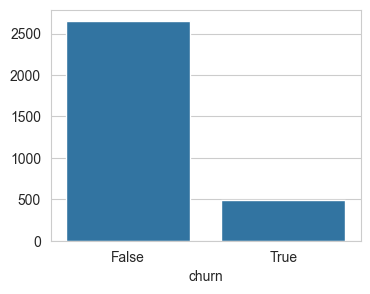

In [7]:
fig, ax = plt.subplots(figsize=(4,3))
sns.countplot(x='churn', data=df)
plt.ylabel('')

values_count = df.groupby('churn')['churn'].count()
values_frac = values_count / len(df)
print(values_frac)

**Observations**
- One-sixth have terminated the company's services. Churn is also our target variable for the dataset.

In [8]:
def draw_mean_median(dataframe, axes, i):
    """
    Function for drawing a mean and median line.
    Arg: df['column']
    """
    axes[(i//3), (i%3)].axvline(x=np.mean(dataframe),
            color='red',
            label='mean')
    axes[(i//3), (i%3)].axvline(x=np.median(dataframe),
            color='green',
            ls='--',
            label='median')
    print(str(i//3), (i%3), '| mean: ', np.mean(dataframe), ' | median:', np.median(dataframe))

0 0 | mean:  7.627936507936508  | median: 6.0
0 1 | mean:  32.54190476190476  | median: 35.0
0 2 | mean:  0.9428571428571428  | median: 0.0
1 0 | mean:  4472.459682539683  | median: 2990.0
1 1 | mean:  69.46063492063492  | median: 54.0
1 2 | mean:  73.17492063492064  | median: 21.0
2 0 | mean:  23.50984126984127  | median: 21.0
2 1 | mean:  30.998412698412697  | median: 30.0
2 2 | mean:  470.9729158730159  | median: 228.48


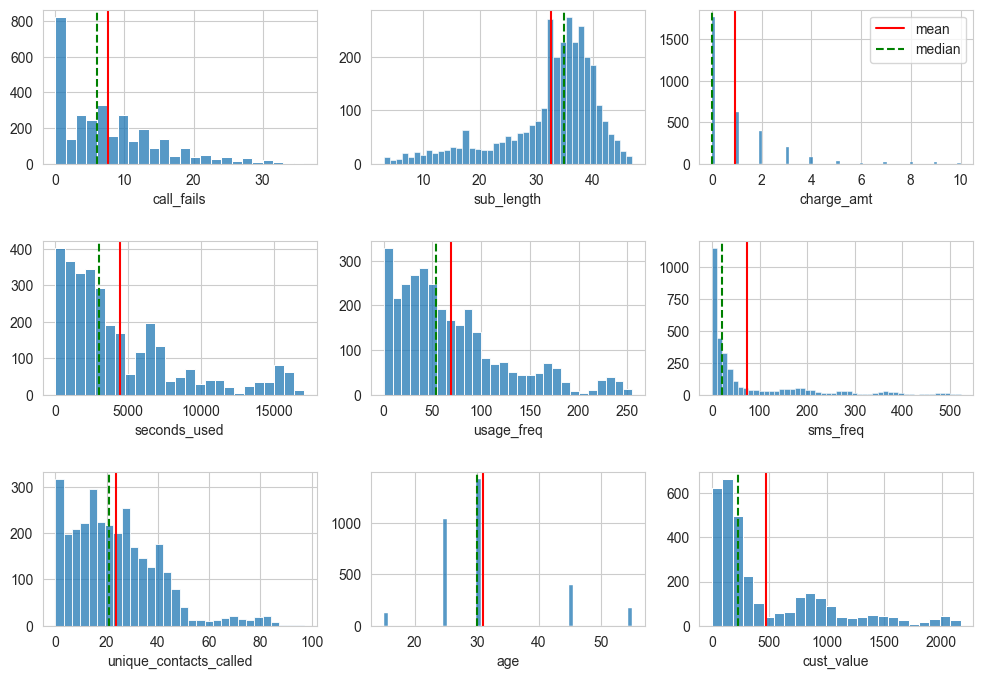

In [9]:
num_list = list(['call_fails', 'sub_length', 'charge_amt', 'seconds_used', 'usage_freq', 'sms_freq', 'unique_contacts_called', 'age', 'cust_value'])

fig1, axes = plt.subplots(3, 3, figsize=(12,8))

for i, num_col in enumerate(num_list):
    sns.histplot(x=df[num_col], ax=axes[(i//3), (i%3)])
    draw_mean_median(df[num_col], axes, i)
    axes[(i//3), (i%3)].set_ylabel('')


fig1.subplots_adjust(wspace=0.2, hspace=0.5)
axes[0,2].legend(loc='upper right')

Since most of the distributions have a skew, I will be referring more to the median as the measure of central tendency, which is less sensitive to skewed distributions and outliers.

**General Observations**
- The distributions for call fails, seconds of use, usage frequency, sms frequency, unique contacts called, and customer value are all positively-skewed. Only the distribution for subscription length has a negative skew. 
- Charge amount is discrete numerical variable.

**Specific Obeservations**
1. The median for number of call failures is 6. 
2. Most of the customers have subscribed to the service for about 35 months.
3. The majority of customers pay for the lower-priced services offered by the company.

4. The median accumulated call time is 2990 seconds (almost 50 minutes), and 
5. the median total calls is 54.
6. A half of the users send below 21 messages.

7. A large chunk of the people have called about 21 unique contacts.
8. Most of the customers are in the age range 25-30.
9. Half of the customers have a customer value below 230.

complained
False    0.923492
True     0.076508
Name: churn, dtype: float64
tariff_plan
Contractual    0.077778
Prepaid        0.922222
Name: churn, dtype: float64
status
Active      0.751746
Inactive    0.248254
Name: churn, dtype: float64


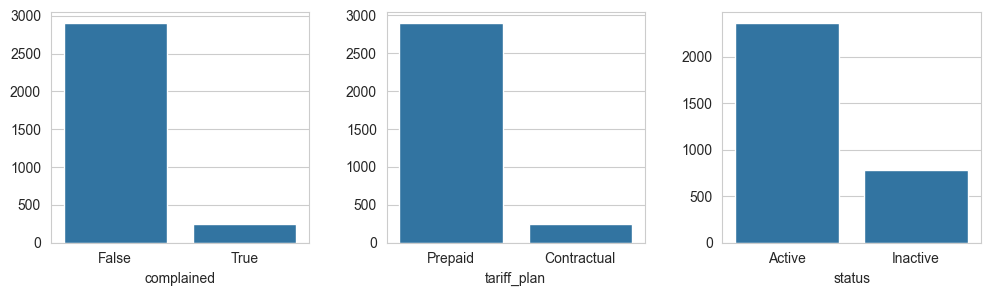

In [11]:
cat_list = list(['complained', 'tariff_plan', 'status'])

fig1, axes = plt.subplots(1, 3, figsize=(12,3))

for i, cat_col in enumerate(cat_list):
    sns.countplot(x=df[cat_col], data=df, ax=axes[i])
    axes[i].set_ylabel('')

    values_count = df.groupby(cat_col)['churn'].count()
    values_frac = values_count / len(df)
    print(values_frac)

fig1.subplots_adjust(wspace=0.3)

**Observations**
- **7.65%** of the customers have complained.
- **92.2%** of the customers have prepaid plans.
- About **a quarter** of the customerbase **are inactive**.

# Bivariate Analysis

## Numeric Features

<Axes: xlabel='call_fails'>

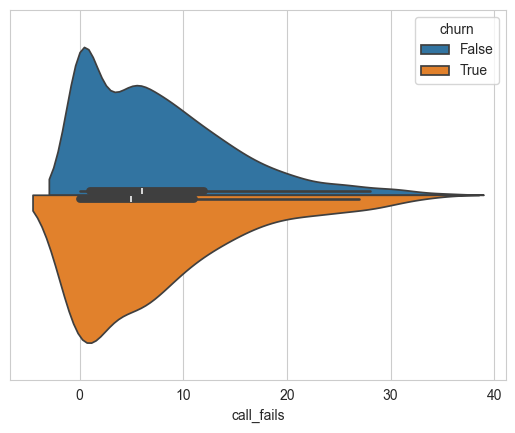

In [10]:
sns.violinplot(data=df, x='call_fails', hue='churn', split = True)

**Observation**
- The two violin plots show similar distributions, in terms of shape, the median, and IQRs. Call fails might not be a good indicator of churn.

complained,False,True
churn,,
False,0.898591,0.170124
True,0.101409,0.829876


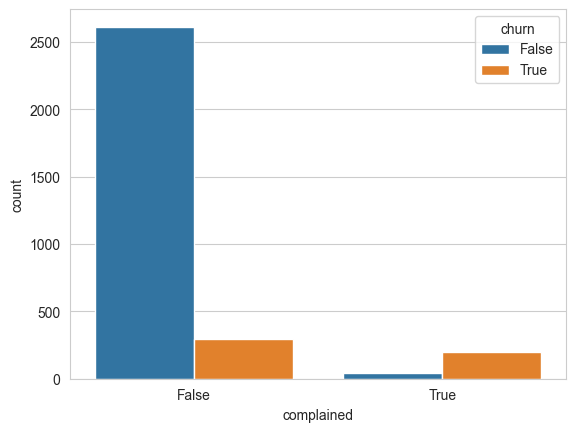

In [15]:
sns.countplot(data=df, x='complained', hue='churn')

plan_vs_complained_tab = pd.crosstab(df['churn'], df['complained'])
plan_vs_complained_tab = plan_vs_complained_tab / plan_vs_complained_tab.sum()
plan_vs_complained_tab

**Observation**
- Customers who have not complained have a 10.1% churn rate.
- Customers who have complained have a whopping 82.9% churn rate.

**Implication**
- This is considered to be an important feature for modeling.

<Axes: xlabel='sub_length'>

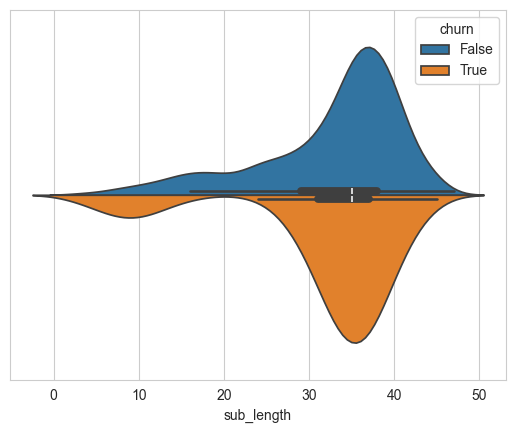

In [26]:
sns.violinplot(data=df, x='sub_length', hue='churn', split = True)

**Observation**
- The distributions and medians are similar. This is not a strong feature to identify churn. 

<Axes: xlabel='charge_amt', ylabel='count'>

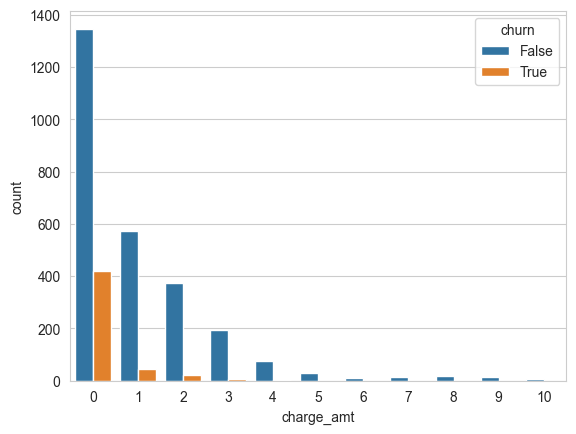

In [13]:
sns.countplot(x='charge_amt', hue='churn', data=df)

Just to check the proportion of the values beyond x=3 (since non-churners have a low count as well):

Text(0.5, 1.0, "Ratio of customers' churning activity at each charge bracket")

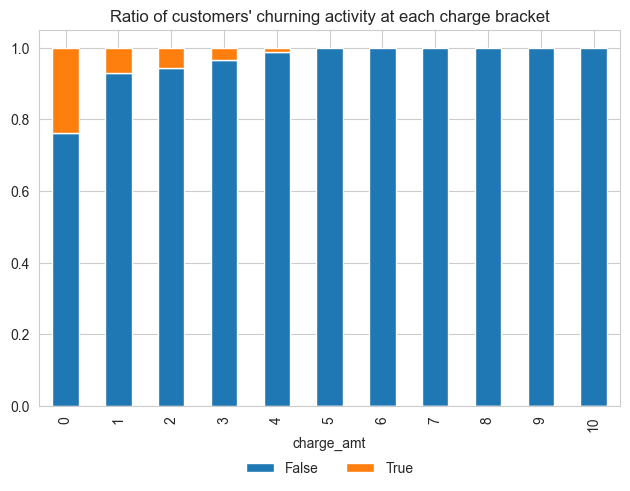

In [14]:
x_var, y_var = "charge_amt", "churn"
df_grouped = df.groupby(x_var)[y_var].value_counts(normalize=True).unstack(y_var)
df_grouped.plot.bar(stacked=True)
plt.legend(
    bbox_to_anchor=(0.5, -0.2),
    loc="lower center",
    borderaxespad=0,
    frameon=False,
    ncol=3,
)
plt.tight_layout()
plt.title("Ratio of customers' churning activity at each charge bracket")

**Observation**
- We can see here that customers who churn have only paid up to scale 4 charge. This indicates that churn is more likely to occur with customers on less expensive plans.

**Implication**
- We consider charge amount to be an important feature.

<Axes: xlabel='seconds_used'>

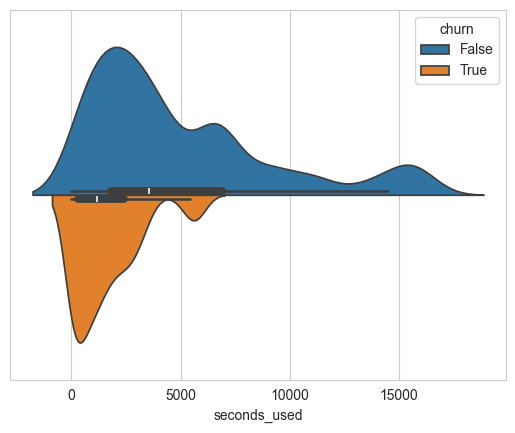

In [30]:
sns.violinplot(data=df, x='seconds_used', hue='churn', split = True)

**Observations**
- Churners' total call lenghts are generally less than those who did not churn, and the distribution is tighter for the churned people.
- Median and IQR values are also distinct.


**Implication**
- Call lengths are considered as important features.

<Axes: xlabel='usage_freq'>

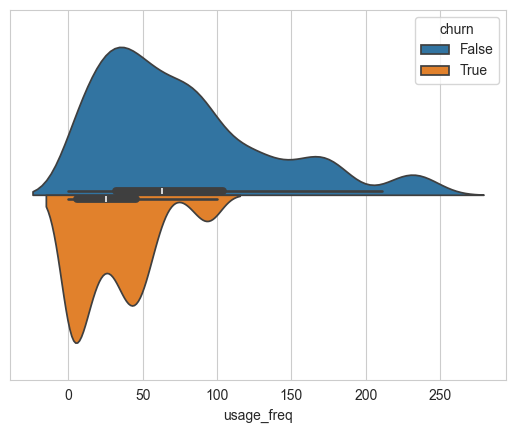

In [32]:
sns.violinplot(data=df, x='usage_freq', hue='churn', split = True)

**Observation**
- Churning customers have a narrower distribution and a less median value as well.

**Implication**
- Usage or call frequency is considered as an important feature.

<Axes: xlabel='sms_freq'>

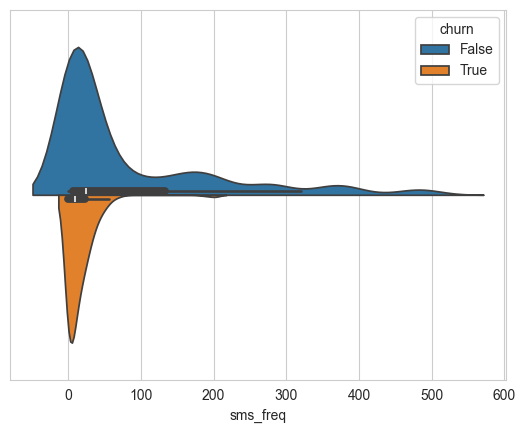

In [34]:
sns.violinplot(data=df, x='sms_freq', hue='churn', split = True)

**Observation**
- The medians are close here and the distributions are alike too, but are different past 100 text messages (and consequently the IQR): there is a minor presence of churn only about 200 SMSs and non for the rest. On the other hand, the SMS for the non-churned customers are more prominent for those with more than 100 SMS.

**Implication**
- SMS frequency is a potential churn indicator.

<Axes: xlabel='unique_contacts_called'>

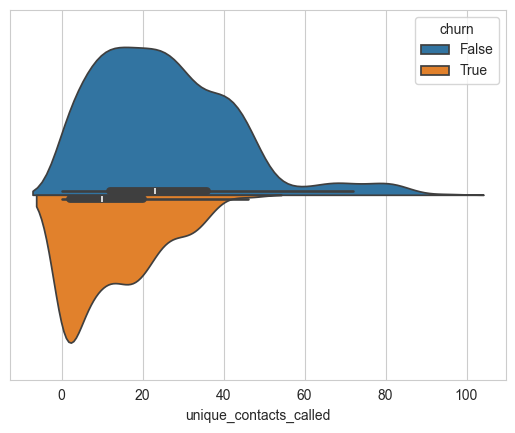

In [18]:
sns.violinplot(data=df, x='unique_contacts_called', hue='churn', split = True)

**Observation**
- Churning customers have had less unique contacts called in contrast to the non-churning customers.
- The churn distribution is positively-skewed, and has a lower mean than the non-churn distribution. Meanwhile, the non-churn distribution has a heavy distribution about its median, with a longer tail of close values from 60 to 80 unique contacts called.

**Implication**
- Consider unique contacts called as an important feature.

churn,False,True
tariff_plan,,
Contractual,0.090019,0.012121
Prepaid,0.909981,0.987879


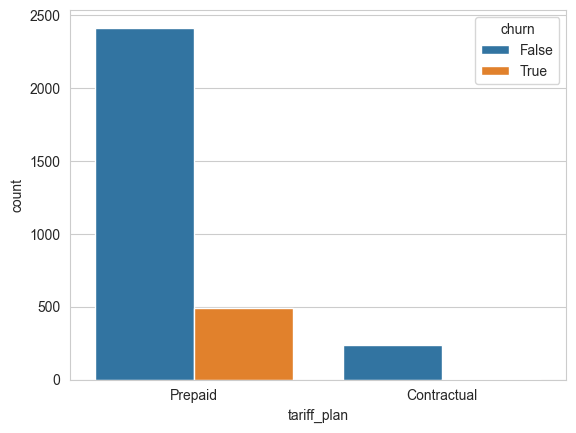

In [49]:
sns.countplot(data=df, x='tariff_plan', hue='churn')

plan_vs_churn_tab = pd.crosstab(df['tariff_plan'], df['churn'])
plan_vs_churn_tab = plan_vs_churn_tab / plan_vs_churn_tab.sum()
plan_vs_churn_tab

**Observation**
- For this dataset, churn on prepaid plan is **9.00%**, while **1.21%** on contractual plans. The difference is 9-fold.

**Implication**
- The tariff plan is considered as an important feature.

status,Active,Inactive
churn,,
False,0.947213,0.526854
True,0.052787,0.473146


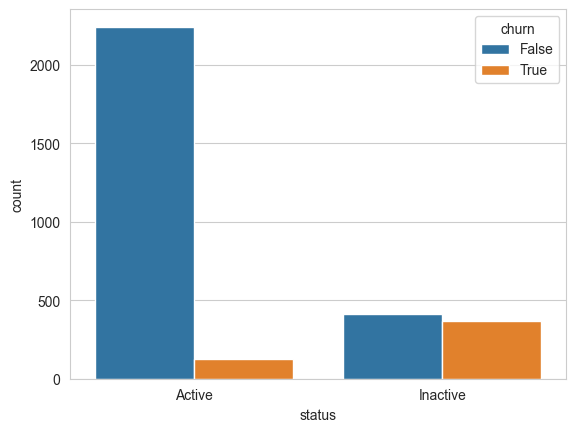

In [52]:
sns.countplot(data=df, x='status', hue='churn')

status_vs_churn_tab = pd.crosstab(df['churn'], df['status'])
status_vs_churn_tab = status_vs_churn_tab / status_vs_churn_tab.sum()
status_vs_churn_tab

**Observation**
- Active accounts have a churn rate of **5.27%**, while inactive accounts have a significantly larger 47.3% churn rate.

**Implication**
- The status is considered as an important feature.

age,15,25,30,45,55
churn,,,,,
False,1.0,0.822565,0.838596,0.8,0.988235
True,0.0,0.177435,0.161404,0.2,0.011765


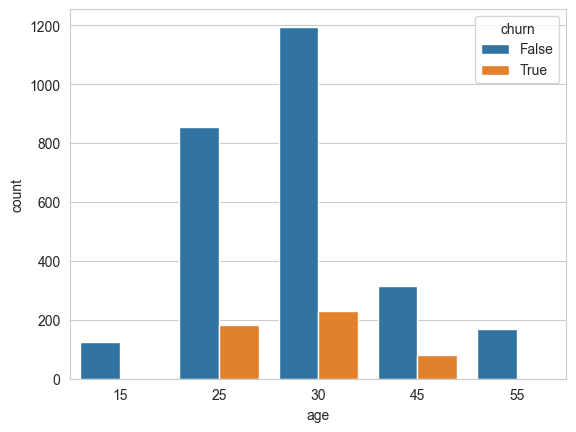

In [60]:
sns.countplot(x='age', hue='churn', data=df)

status_vs_churn_tab = pd.crosstab(df['churn'], df['age'])
status_vs_churn_tab = status_vs_churn_tab / status_vs_churn_tab.sum()
status_vs_churn_tab

**Observations**
- Almost all the churners are from the ages 25, 30, and 45 with churn rates **17.7%**, **16.1%**, and **20.0%**.
- There is **0.00%** churn rate from age 15 and **1.17%** for age 55.

**Implication**
- Age is considered as an important feature.

<Axes: xlabel='cust_value'>

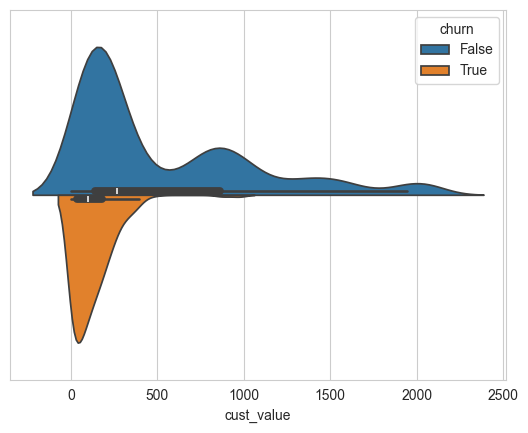

In [21]:
sns.violinplot(data=df, x='cust_value', hue='churn', split = True)

**Observation**
- The distributions are most different beyond customer value 500. Churning customers tend to have a value less than 500, while for non-churning customers, there is more variability for their customer values.

**Implication** 
- Customer value is considered as an important feature.

# Multivariate Analysis

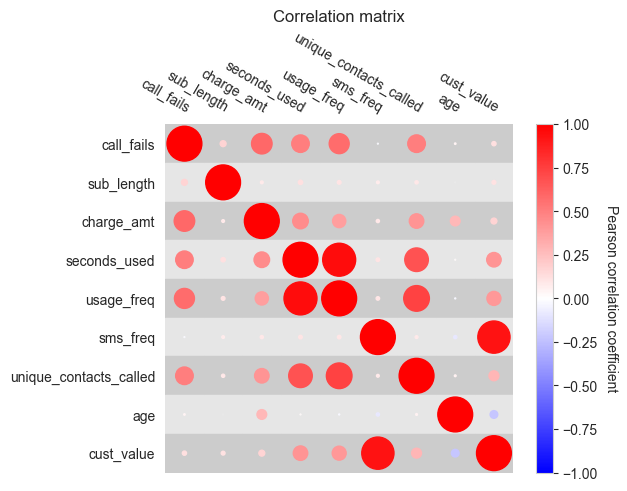

In [68]:
num_list = list(['call_fails', 'sub_length', 'charge_amt', 'seconds_used', 'usage_freq', 'sms_freq', 'unique_contacts_called', 'age', 'cust_value'])
correl_data = df[num_list]
correl_matrix = correl_data.corr()

from psynlig import plot_correlation_heatmap

kwargs = {
    'heatmap': {
        'vmin': -1,
        'vmax': 1,
        'cmap': 'bwr',
    }
}

plot_correlation_heatmap(correl_data, bubble=True, annotate=False, **kwargs)

plt.title('Correlation matrix')
plt.show()

**Observations**
- From a common sense standpoint, it makes sense that usage (call) frequency is highly correlated with total length of calls. More calls leads to longer total call length. 
- I assume that the customer activity is one of the components when computing the customer value, but it happens that SMS frequency has the highest correlation with customer value.

**Action**
- We have multicollinearity, so we'll use the variance inflation factor.

In [77]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# sub_length is removed
X = df[['call_fails', 'charge_amt', 'seconds_used', 'usage_freq', 'sms_freq', 'unique_contacts_called', 'age', 'cust_value']]
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

                  Feature        VIF
0              call_fails   4.749882
1              charge_amt   2.964811
2            seconds_used  33.818931
3              usage_freq  37.993574
4                sms_freq  37.562895
5  unique_contacts_called   6.773448
6                     age   3.274927
7              cust_value  56.329023


For trial purposes, I will remove usage_freq and cust_value for the following reasons: 
- seconds_used is more skewed than usage_freq; and 
- sms_freq is the independent variable in contrast to the cust_value.

In [81]:
# usage_freq, cust_value is removed
X = df[['call_fails', 'charge_amt', 'seconds_used', 'sms_freq', 'unique_contacts_called', 'age']]
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

                  Feature       VIF
0              call_fails  3.679296
1              charge_amt  2.220766
2            seconds_used  4.315929
3                sms_freq  1.394353
4  unique_contacts_called  5.568227
5                     age  2.904331


A VIF of 0-5 indicates low correlation, and 5-10 is still an acceptable value. I think we have found our features!

# Recap
- The following numerical variables are considered as good predictors for churn: complained, charge_amt, seconds_used, usage_freq, sms_freq, unique_contacts_called, cust_value.
- For the categorical variables, potential predictors are: complained, tariff_plan, status, age bracket (as ordinal categorical).
- Reconsider dropping features vs. combining using PCA or using feature selection methods.